In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored

import warnings

warnings.filterwarnings("ignore")

In [3]:
#import functions_20221010
from functions_b__get_the_data_20221116 import set_csv_directory, get_combined_dataset
from functions_d1__prepare_cleanse_data_20221116 import add_supplements, tidy_dataset

In [4]:
LABEL = 'Price'

booleans = []
floats = ['bedrooms', 'bathrooms', 'nearestStation', 'latitude_deviation','longitude_deviation']
categories = ['tenure.tenureType']

features = []
features.extend(booleans)
features.extend(floats)
features.extend(categories)
print(colored(f"features", "blue"), "-> ", features)

features.insert(0, LABEL)
print(colored(f"label", "green"), "-> ", LABEL)

features ->  ['bedrooms', 'bathrooms', 'nearestStation', 'latitude_deviation', 'longitude_deviation', 'tenure.tenureType']
label ->  Price


In [5]:
IN_COLAB = False

VERSION = 'v03'
filename = f'df_listings_{VERSION}.csv'
remote_pathname = f'https://raw.githubusercontent.com/jayportfolio/capstone_streamlit/main/data/final/{filename}'

df_pathname_raw = f'../../data/source/{filename}'
df_pathname_tidy = f'../../data/final/{filename}'

df_orig = pd.read_csv(df_pathname_tidy, on_bad_lines='error', index_col=0)

In [6]:
#df = functions_20221010.pre_tidy_dataset(df_orig, warnings=False)
df = add_supplements(df_orig, version=3)

In [7]:
df = df[features]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51501 entries, 14520525 to 126181118
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                51501 non-null  int64  
 1   bedrooms             49787 non-null  float64
 2   bathrooms            48352 non-null  float64
 3   nearestStation       51501 non-null  float64
 4   latitude_deviation   51491 non-null  float64
 5   longitude_deviation  51501 non-null  float64
 6   tenure.tenureType    48149 non-null  object 
dtypes: float64(5), int64(1), object(1)
memory usage: 3.1+ MB


In [8]:
print(len(df_orig))
old_length = len(df_orig)

print(f"{old_length} ==> {len(df)}")
old_length = len(df)

51501
51501 ==> 51501


<div id = 3 style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#b08888;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px;
           display:flex;
            justify-content:center;">

<h2 style="padding: 2rem;
              color:white;
          text-align:center;
          margin:0 auto;
          ">
    ACTION - Force location.latitude to be a float, rather than a string
</h2>
</div>

In [9]:
try:
    df['location.latitude'] = pd.to_numeric(df['location.latitude'], 'coerce').dropna().astype(float)
except:
    pass

print(f"{old_length} ==> {len(df)}")
old_length = len(df)

51501 ==> 51501


In [10]:
df['tenure.tenureType'] = df['tenure.tenureType'].astype('category')

print(f"{old_length} ==> {len(df)}")
old_length = len(df)

51501 ==> 51501


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,51501.0,420845.464438,109595.522981,1.000000e+05,335000.000000,425000.000000,500000.000000,600000.000000
bedrooms,49787.0,11.838693,2196.020360,1.000000e+00,1.000000,2.000000,3.000000,490000.000000
bathrooms,48352.0,1.177159,0.410369,1.000000e+00,1.000000,1.000000,1.000000,12.000000
nearestStation,51501.0,0.445829,1.071443,0.000000e+00,0.224756,0.364523,0.558390,192.431869
latitude_deviation,51491.0,0.069527,0.046570,4.000000e-07,0.031133,0.063754,0.101051,0.220523
longitude_deviation,51501.0,0.139151,0.723483,2.000000e-07,0.046505,0.103319,0.197665,51.623851


In [12]:
df.describe(include=['object','category'], exclude=[]).T

,count,unique,top,freq
tenure.tenureType,48149,4,LEASEHOLD,29647


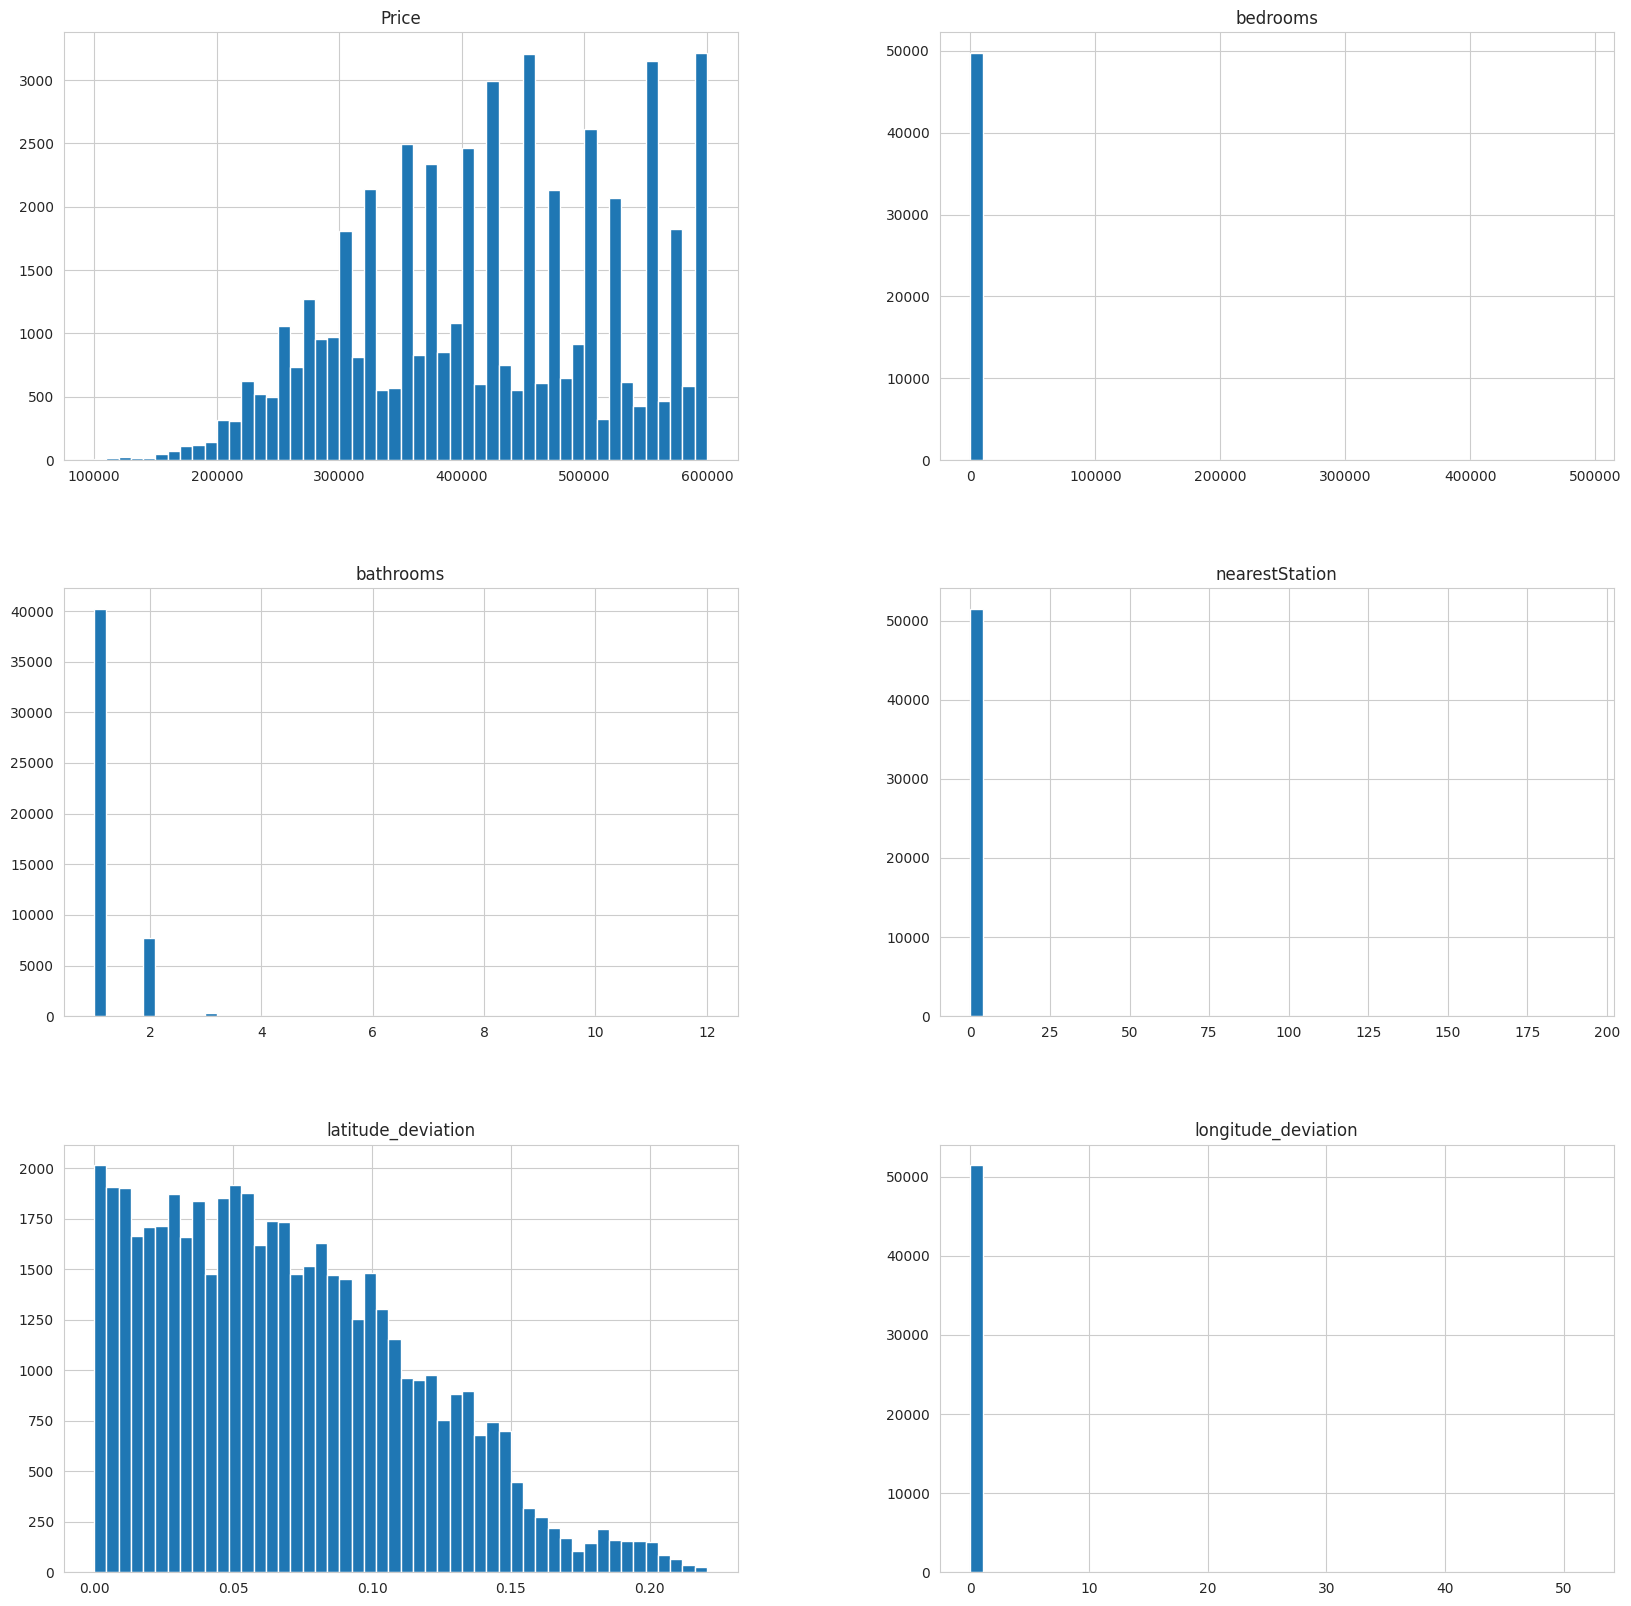

In [13]:
%matplotlib inline
df.hist(bins=50, figsize=(20, 20))
plt.show()

<div id = 3 style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#b08888;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px;
           display:flex;
            justify-content:center;">

<h2 style="padding: 2rem;
              color:white;
          text-align:center;
          margin:0 auto;
          ">
    IDENTIFY OUTLIERS


</h2>
</div>

In [14]:
df.isna().sum()

Price                     0
bedrooms               1714
bathrooms              3149
nearestStation            0
latitude_deviation       10
longitude_deviation       0
tenure.tenureType      3352
dtype: int64

In [15]:
# Identifying outliers, in order to try and verify (from the source data) that they are incorrect data.
df[df['bedrooms'] > 5].sort_values('bedrooms',ascending=False)

,Price,bedrooms,bathrooms,nearestStation,latitude_deviation,longitude_deviation,tenure.tenureType
125513798,490000,490000.0,2.0,0.150384,0.117628,0.275165,LEASEHOLD
125543333,550000,7.0,NaN,1.642956,0.131338,0.225165,FREEHOLD
119217689,525000,7.0,2.0,0.393151,0.075898,0.183315,FREEHOLD
124019570,600000,7.0,2.0,0.909304,0.066791,0.249925,FREEHOLD
84063621,600000,6.0,2.0,0.525190,0.199577,0.029211,FREEHOLD
123693851,535000,6.0,3.0,0.416445,0.180359,0.016414,FREEHOLD
125568515,575000,6.0,3.0,1.334739,0.065318,0.396524,FREEHOLD
125047877,525000,6.0,3.0,0.592597,0.196419,0.022395,FREEHOLD
125000246,525000,6.0,2.0,0.118946,0.027205,0.120255,FREEHOLD
124799777,520000,6.0,2.0,0.743722,0.016698,0.144275,FREEHOLD


In [16]:
# Identifying outliers, in order to try and verify (from the source data) that they are incorrect data.
df[df['bedrooms'] > 10].sort_values('bedrooms',ascending=False)

,Price,bedrooms,bathrooms,nearestStation,latitude_deviation,longitude_deviation,tenure.tenureType
125513798,490000,490000.0,2.0,0.150384,0.117628,0.275165,LEASEHOLD


In [17]:
# Identifying outliers, in order to try and verify (from the source data) that they are incorrect data.
df[df['bathrooms'] > 5]

,Price,bedrooms,bathrooms,nearestStation,latitude_deviation,longitude_deviation,tenure.tenureType
122875514,485000,3.0,12.0,0.095729,0.062650,0.002423,FREEHOLD
123034523,365000,1.0,11.0,0.242776,0.048785,0.077410,NaN


In [18]:
# Identifying outliers, in order to try and verify (from the source data) that they are incorrect data.
df[df['longitude_deviation'] > 1]

,Price,bedrooms,bathrooms,nearestStation,latitude_deviation,longitude_deviation,tenure.tenureType
117726977,250000,NaN,NaN,0.204070,NaN,51.481318,LEASEHOLD
118737587,600000,4.0,2.0,0.559261,NaN,51.541462,FREEHOLD
119410649,280000,2.0,2.0,0.060633,NaN,51.623851,LEASEHOLD
120572951,300000,NaN,1.0,0.403894,NaN,51.465900,FREEHOLD
121441124,300000,NaN,NaN,0.141185,NaN,51.586123,LEASEHOLD
122251739,400000,3.0,2.0,0.352386,NaN,51.533055,FREEHOLD
123704549,395000,4.0,2.0,0.499003,NaN,51.535895,FREEHOLD
124725866,395000,NaN,NaN,0.346325,NaN,51.484111,FREEHOLD
124725887,400000,NaN,NaN,0.392091,NaN,51.540965,FREEHOLD
124900562,220000,NaN,NaN,0.549313,NaN,51.602991,FREEHOLD


In [19]:
# Identifying outliers, in order to try and verify (from the source data) that they are incorrect data.
df[df['latitude_deviation'] > 1]

,Price,bedrooms,bathrooms,nearestStation,latitude_deviation,longitude_deviation,tenure.tenureType


In [20]:
# Identifying outliers, in order to try and verify (from the source data) that they are incorrect data.
df[df['nearestStation'] > 20]

,Price,bedrooms,bathrooms,nearestStation,latitude_deviation,longitude_deviation,tenure.tenureType
105719081,224995,3.0,2.0,192.431869,0.005607,0.066473,FREEHOLD
117858356,285000,2.0,NaN,40.309392,0.001492,0.214350,FREEHOLD
122768234,270000,3.0,2.0,119.325844,0.035662,0.084105,FREEHOLD


In [21]:
# Identifying outliers, in order to try and verify (from the source data) that they are incorrect data.
df[df['nearestStation'] > 10].sort_values('nearestStation', ascending=False)

,Price,bedrooms,bathrooms,nearestStation,latitude_deviation,longitude_deviation,tenure.tenureType
105719081,224995,3.0,2.0,192.431869,0.005607,0.066473,FREEHOLD
122768234,270000,3.0,2.0,119.325844,0.035662,0.084105,FREEHOLD
117858356,285000,2.0,NaN,40.309392,0.001492,0.214350,FREEHOLD
118856216,285000,2.0,1.0,16.168861,0.073798,0.246599,LEASEHOLD
119522684,360000,2.0,2.0,16.153746,0.192118,0.023254,LEASEHOLD
113253098,260000,2.0,NaN,13.772327,0.036363,0.170095,LEASEHOLD
122929250,205000,1.0,1.0,11.455267,0.032122,0.030087,LEASEHOLD


In [22]:
df = df[(df['bedrooms'] <= 10)]
df = df[df['bathrooms'] <= 5]
df = df[((df['longitude_deviation'] <= 1) & (df['latitude_deviation'] <= 1))]
df = df[(df['nearestStation'] <= 10)]

print(f"{old_length} ==> {len(df)}")
old_length = len(df)

df.describe().T

51501 ==> 46874


,count,mean,std,min,25%,50%,75%,max
Price,46874.0,425071.306375,107225.717698,1.000000e+05,349950.000000,425000.000000,515000.000000,600000.000000
bedrooms,46874.0,1.992469,0.828836,1.000000e+00,1.000000,2.000000,3.000000,7.000000
bathrooms,46874.0,1.182105,0.409901,1.000000e+00,1.000000,1.000000,1.000000,5.000000
nearestStation,46874.0,0.439340,0.331712,0.000000e+00,0.227198,0.367971,0.559685,8.485819
latitude_deviation,46874.0,0.070193,0.046877,4.000000e-07,0.031454,0.064650,0.101920,0.220523
longitude_deviation,46874.0,0.128443,0.101540,2.000000e-07,0.045585,0.102448,0.196928,0.433210


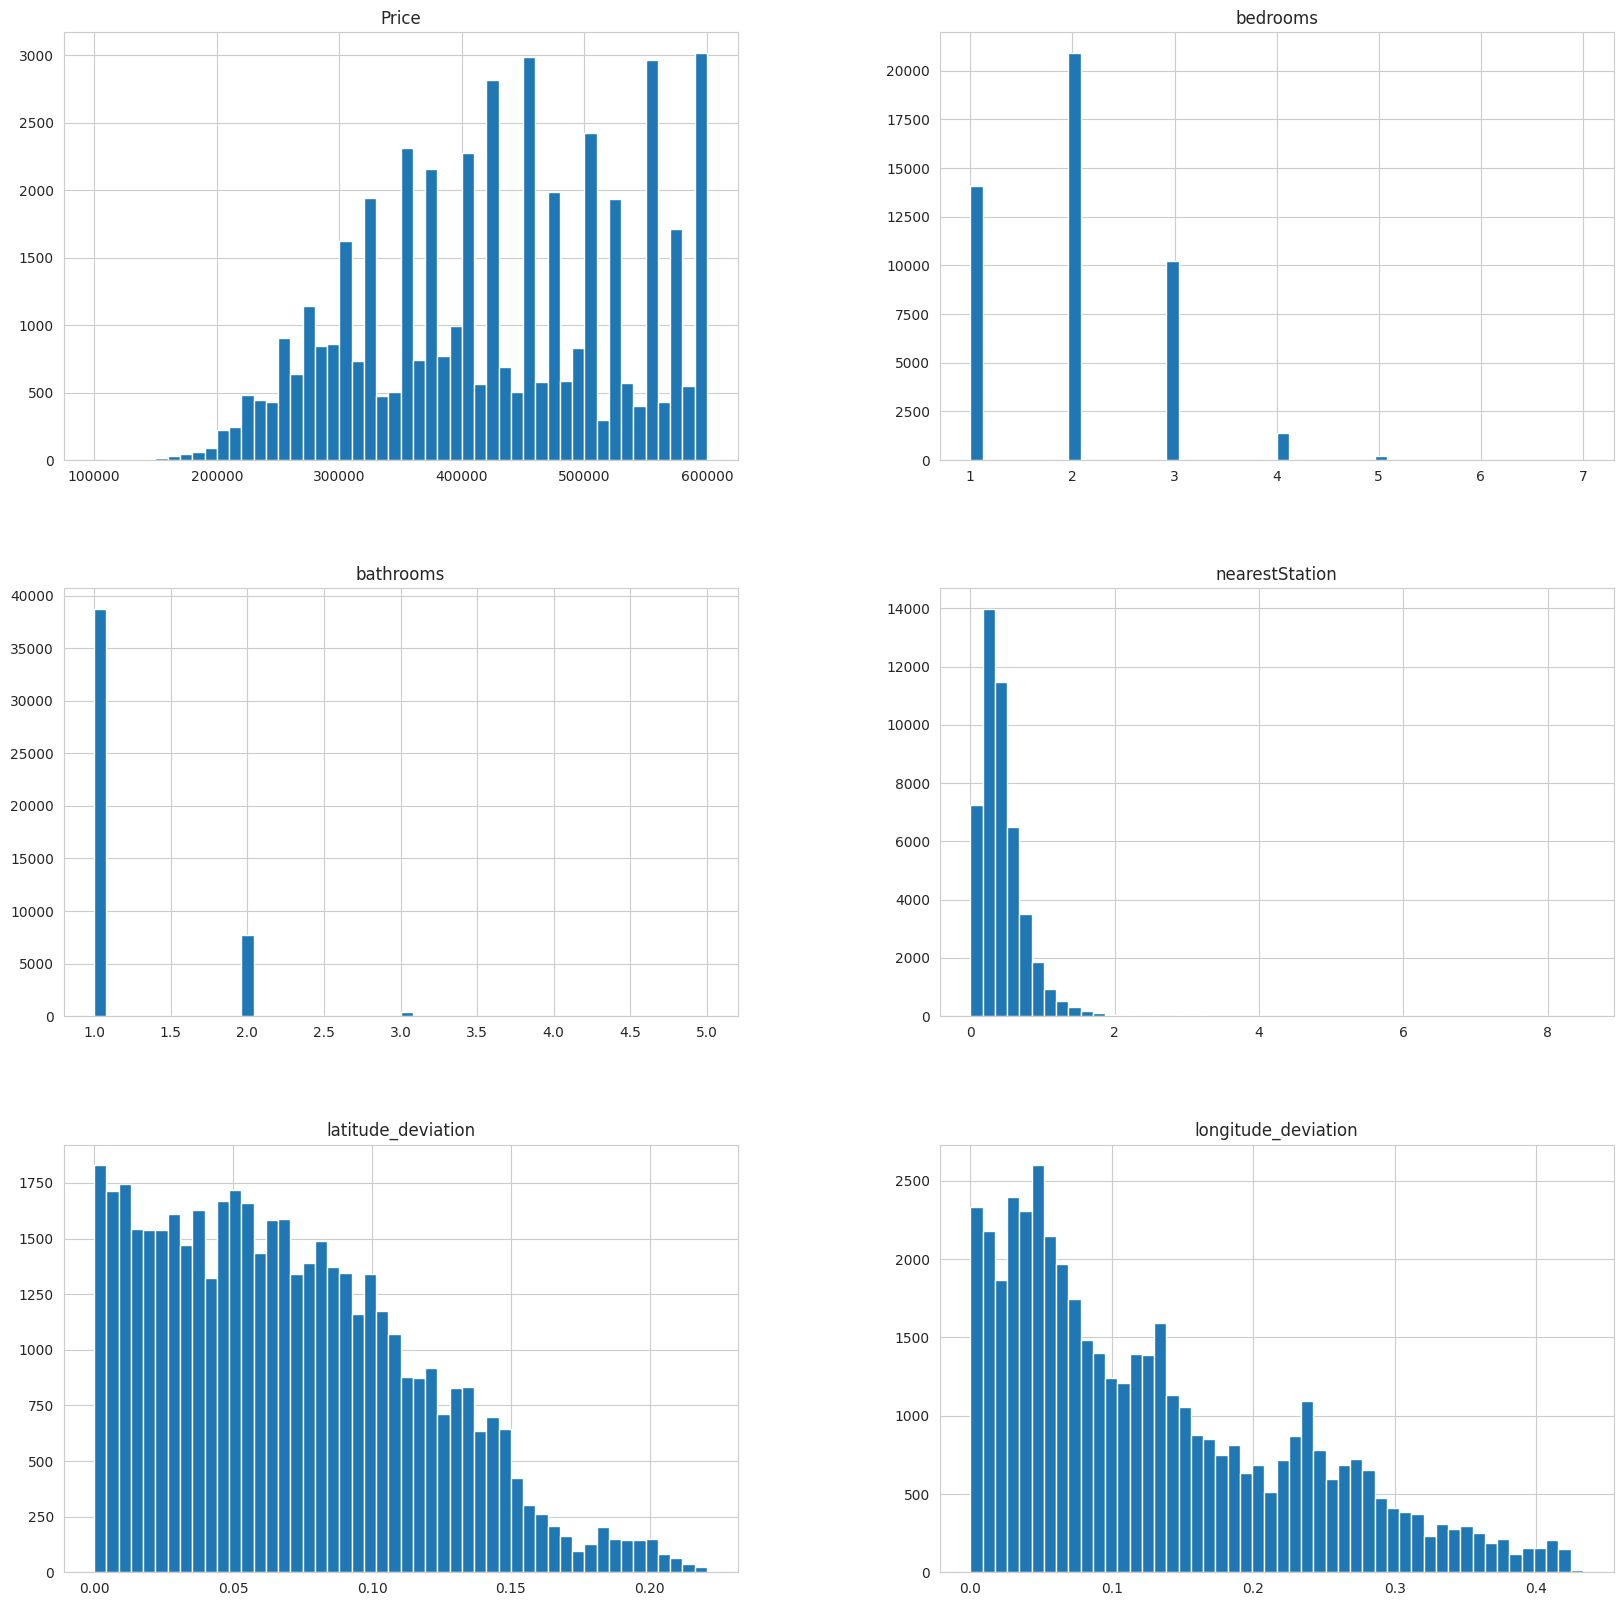

In [23]:
df.hist(bins=50, figsize=(20, 20))
plt.show()

In [24]:
df.isna().any()
df.isna().sum()

Price                     0
bedrooms                  0
bathrooms                 0
nearestStation            0
latitude_deviation        0
longitude_deviation       0
tenure.tenureType      2744
dtype: int64

In [25]:
df = df.dropna()
print(f"{old_length} ==> {len(df)}")
old_length = len(df)
df.describe()

46874 ==> 44130


,Price,bedrooms,bathrooms,nearestStation,latitude_deviation,longitude_deviation
count,44130.000000,44130.000000,44130.000000,44130.000000,4.413000e+04,4.413000e+04
mean,425226.666531,1.990981,1.181373,0.439046,7.010609e-02,1.279064e-01
std,107201.623822,0.827621,0.408954,0.330310,4.706003e-02,1.011758e-01
min,100000.000000,1.000000,1.000000,0.000000,4.000000e-07,2.000000e-07
25%,349961.250000,1.000000,1.000000,0.227562,3.105010e-02,4.531360e-02
50%,425000.000000,2.000000,1.000000,0.368385,6.445300e-02,1.021037e-01
75%,515000.000000,3.000000,1.000000,0.559525,1.019883e-01,1.959382e-01
max,600000.000000,7.000000,5.000000,8.485819,2.205226e-01,4.332102e-01


In [26]:
df_features = df.drop(LABEL, axis=1)
df_features

,bedrooms,bathrooms,nearestStation,latitude_deviation,longitude_deviation,tenure.tenureType
14520525,3.0,1.0,0.274316,0.067288,0.141915,LEASEHOLD
27953107,2.0,2.0,0.305845,0.086728,0.417495,LEASEHOLD
33593487,2.0,1.0,0.438045,0.015482,0.273665,FREEHOLD
35271294,2.0,1.0,0.399307,0.013094,0.075049,LEASEHOLD
44749111,2.0,1.0,0.410550,0.092612,0.147305,FREEHOLD
...,...,...,...,...,...,...
126179018,2.0,1.0,0.682879,0.092011,0.173241,FREEHOLD
126179672,3.0,2.0,0.545665,0.105492,0.009635,LEASEHOLD
126180107,2.0,1.0,0.191407,0.068753,0.012141,LEASEHOLD
126180704,2.0,1.0,0.308609,0.080479,0.076603,LEASEHOLD


In [27]:
use_one_hot_encoding_not_dummies = False

if use_one_hot_encoding_not_dummies:
    raise NotImplementedError('not implemented one hot encoding yet')

    #from sklearn.preprocessing import OneHotEncoder
    #tenure_encoder = OneHotEncoder()
    #df_tenure_type = tenure_encoder.fit_transform(df_features[['tenure.tenureType']])
else:
    for column in categories:
        df_features = pd.concat([df_features, pd.get_dummies(df_features[column], prefix=column, drop_first=True)], axis=1)
        df_features.drop([column], axis=1, inplace=True)  # now drop the original column (you don't need it anymore),

features_corr = df_features.corr()
features_corr

,bedrooms,bathrooms,nearestStation,latitude_deviation,longitude_deviation,tenure.tenureType_FREEHOLD,tenure.tenureType_LEASEHOLD,tenure.tenureType_SHARE_OF_FREEHOLD
bedrooms,1.000000,0.328417,0.238049,0.159608,0.128350,0.596530,-0.462538,-0.121314
bathrooms,0.328417,1.000000,0.048837,0.033335,0.062475,0.089882,-0.039325,-0.063858
nearestStation,0.238049,0.048837,1.000000,0.147732,0.268102,0.303433,-0.218754,-0.086539
latitude_deviation,0.159608,0.033335,0.147732,1.000000,-0.032965,0.197226,-0.147558,-0.047978
longitude_deviation,0.128350,0.062475,0.268102,-0.032965,1.000000,0.203914,-0.146933,-0.058149
tenure.tenureType_FREEHOLD,0.596530,0.089882,0.303433,0.197226,0.203914,1.000000,-0.762383,-0.222934
tenure.tenureType_LEASEHOLD,-0.462538,-0.039325,-0.218754,-0.147558,-0.146933,-0.762383,1.000000,-0.460376
tenure.tenureType_SHARE_OF_FREEHOLD,-0.121314,-0.063858,-0.086539,-0.047978,-0.058149,-0.222934,-0.460376,1.000000


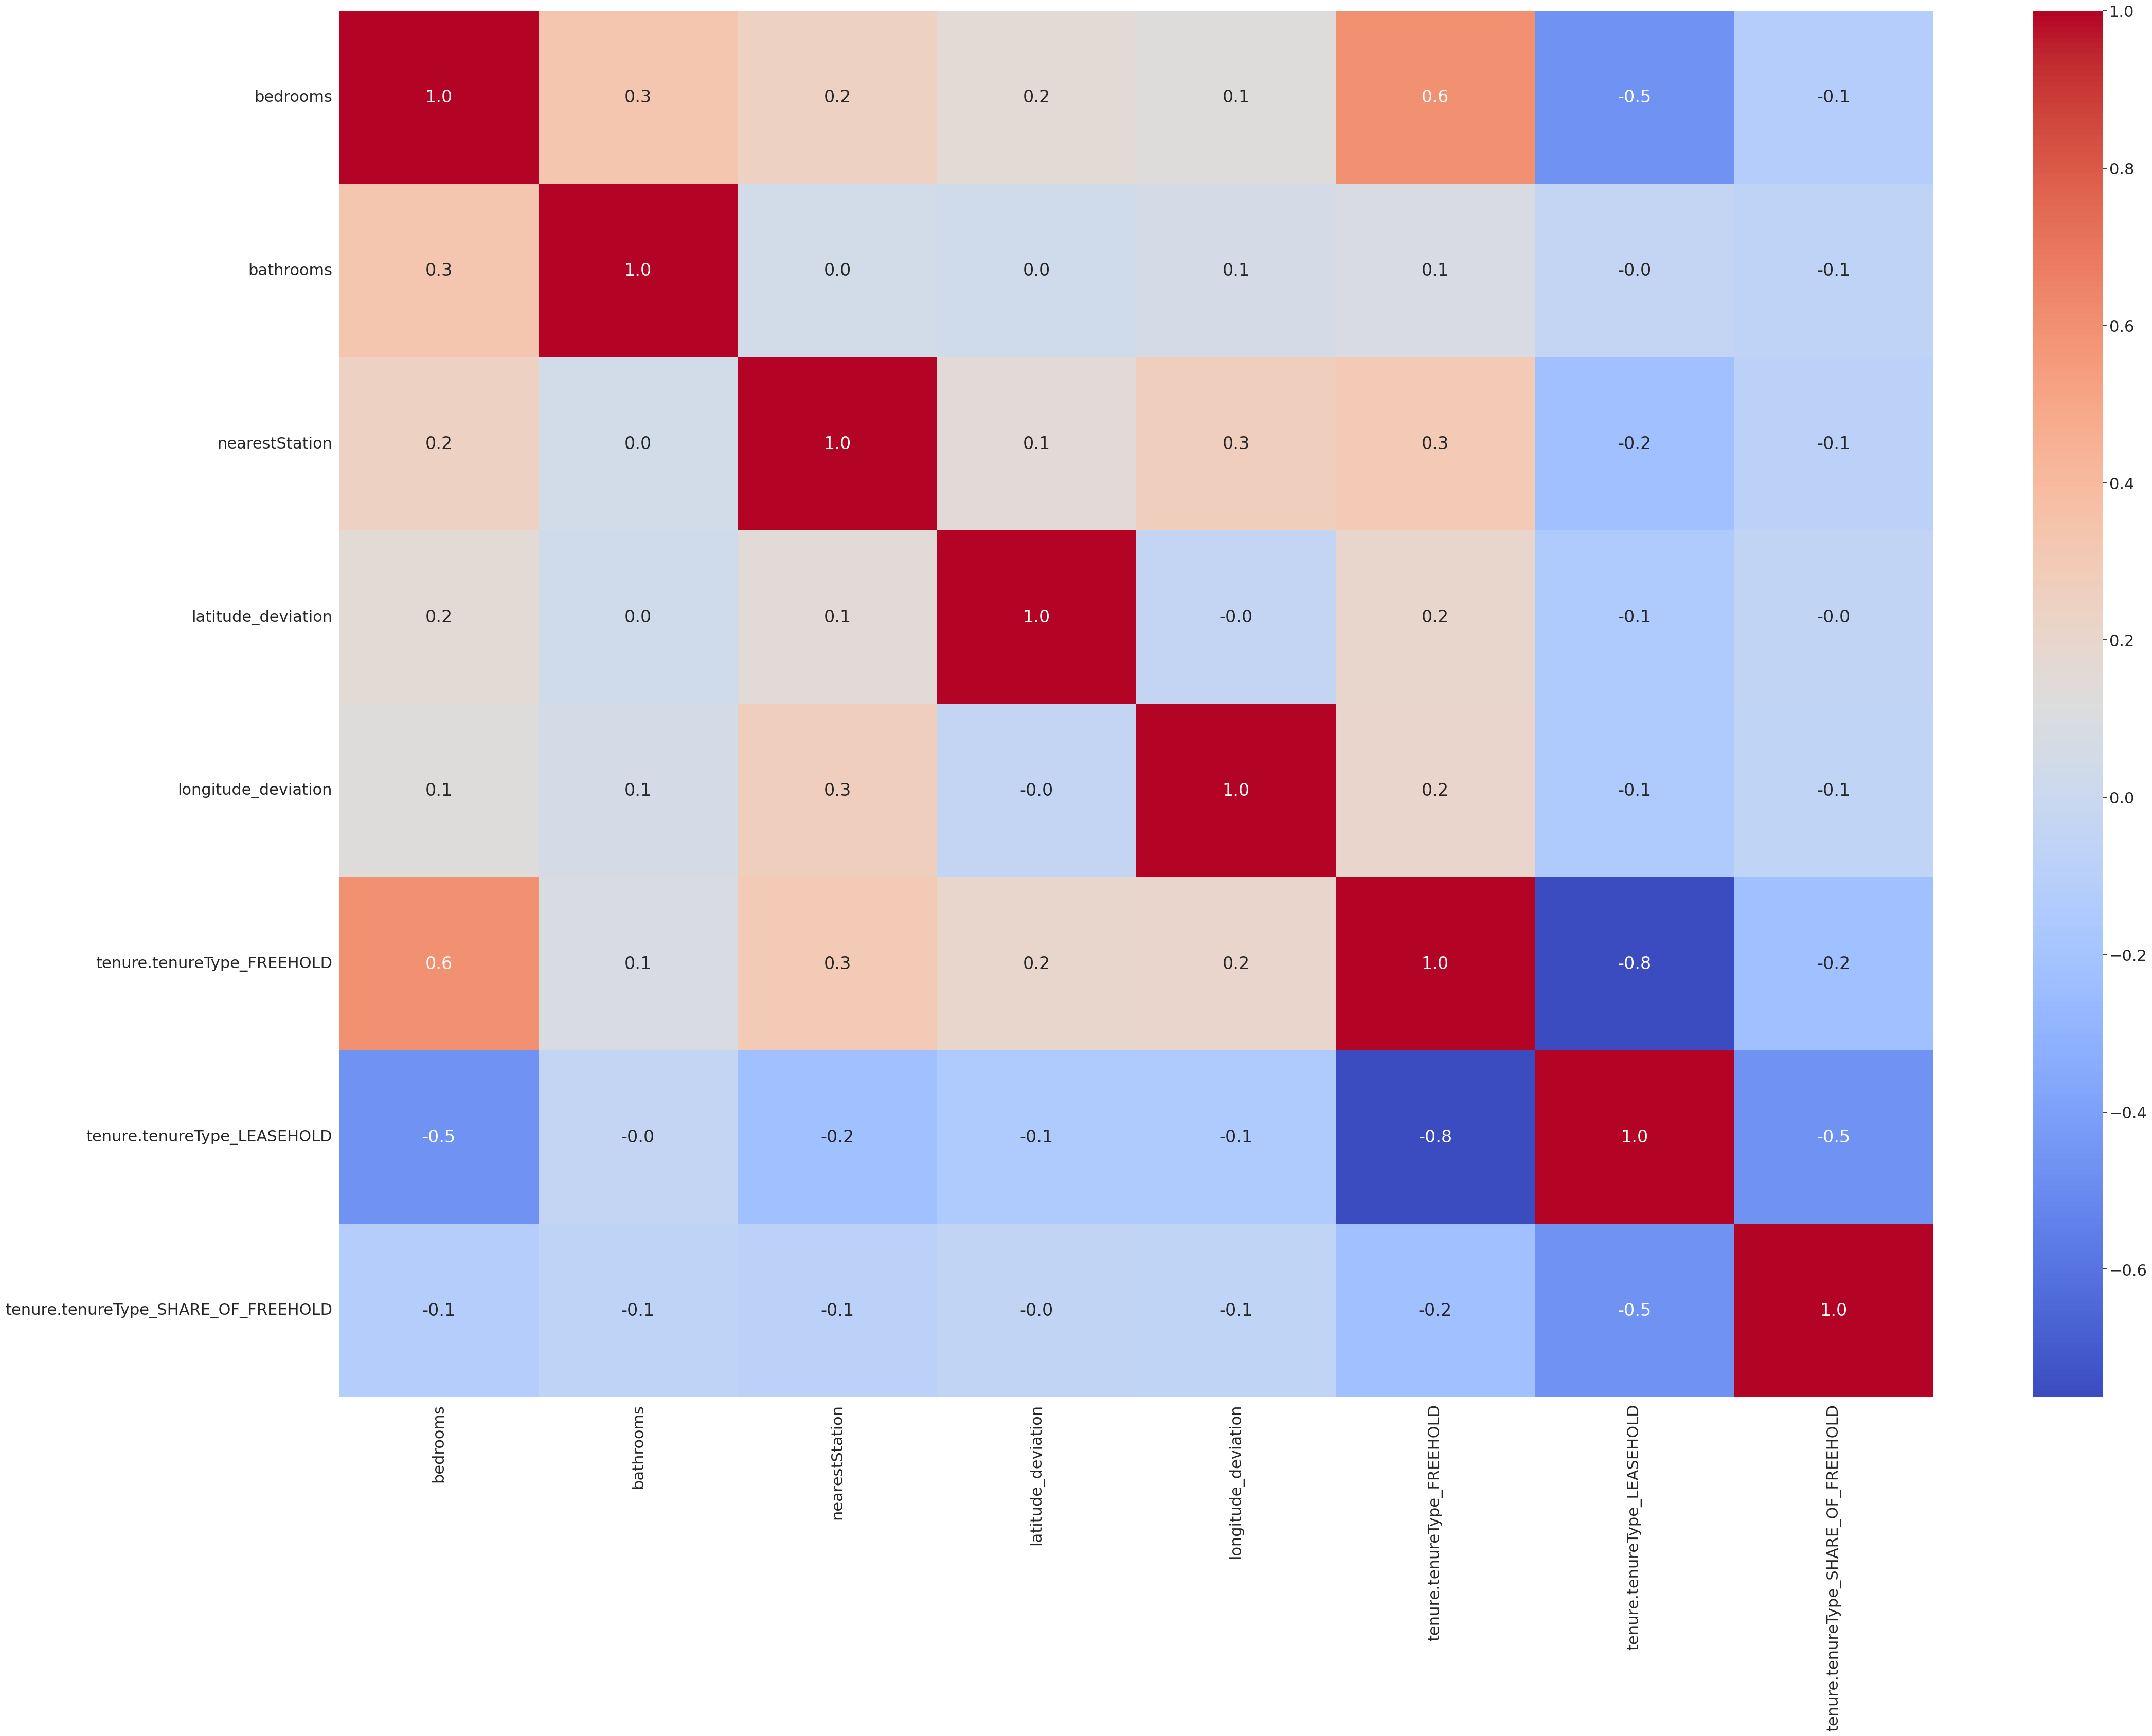

In [28]:
sns.set(font_scale=2)
plt.figure(figsize=(50, 35))
ax = sns.heatmap(features_corr, annot=True, fmt='.1f', cmap='coolwarm')

In [29]:
data_corr = df.corr()
data_corr_dict = data_corr["Price"].sort_values(ascending=False).to_dict()
data_corr_dict

{'Price': 1.0,
 'bedrooms': 0.47612306123997344,
 'bathrooms': 0.2674400473565465,
 'nearestStation': -0.021897621820172086,
 'longitude_deviation': -0.03963125331186145,
 'latitude_deviation': -0.04368516620092042}

In [30]:
#print the most positively correlated features
pos_corr = {k: v for k, v in data_corr_dict.items() if v > 0.1 and v != 1}
pos_corr

{'bedrooms': 0.47612306123997344, 'bathrooms': 0.2674400473565465}

In [31]:
#print the most negatively correlated features
neg_corr = {k: v for k, v in data_corr_dict.items() if v < -0.1}
neg_corr

{}

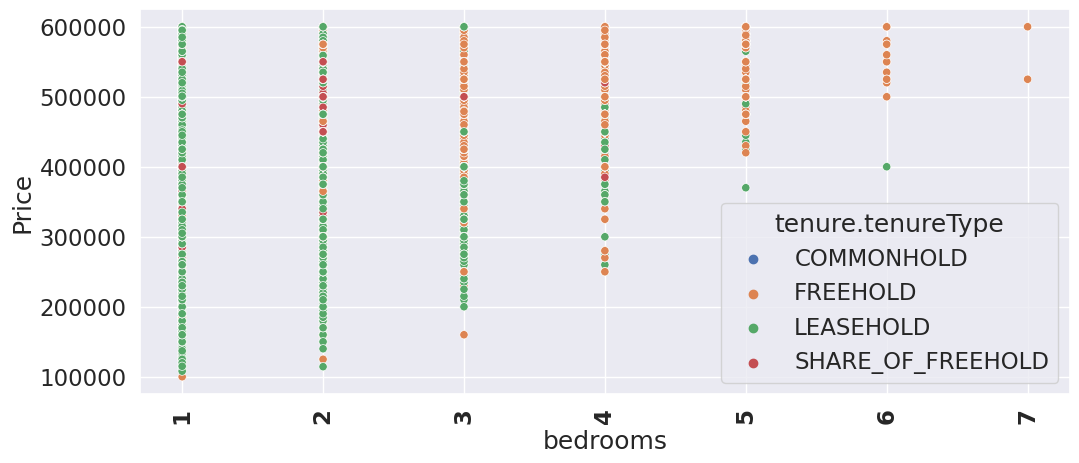

In [32]:
plt.figure(figsize=(12, 5))
sns.set(font_scale=1.5)
sns.scatterplot(x='bedrooms', y='Price', data=df, hue='tenure.tenureType')
plt.xticks(weight='bold', rotation=90)
plt.show()

In [33]:
plt.figure(figsize=(12, 12))
sns.set(font_scale=1.5)
sns.scatterplot(x='location.latitude', y='Price', data=df, hue='tenure.tenureType')
plt.xticks(weight='bold', rotation=90)
plt.show()

ValueError: Could not interpret value `location.latitude` for parameter `x`

<Figure size 1200x1200 with 0 Axes>

In [ ]:
plt.figure(figsize=(12, 12))
sns.set(font_scale=1.5)
sns.scatterplot(x='location.longitude', y='Price', data=df, hue='tenure.tenureType')
plt.xticks(weight='bold', rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(12, 12))
sns.set(font_scale=1.5)
sns.scatterplot(x='location.latitude', y='location.longitude', data=df, hue='tenure.tenureType')
plt.xticks(weight='bold', rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(12, 12))
sns.set(font_scale=1.5)
sns.scatterplot(x='location.latitude', y='location.longitude', data=df[(df['bedrooms'] == 2)], hue='Price',palette=sns.light_palette("seagreen", as_cmap=True), alpha=1)
plt.xticks(weight='bold', rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(12, 12))
sns.set(font_scale=1.5)
sns.scatterplot(x='location.latitude', y='location.longitude', data=df[(df['bedrooms'] == 2) & (df['tenure.tenureType'] == 'LEASEHOLD')], hue='Price',palette=sns.light_palette("seagreen", as_cmap=True)
)
plt.xticks(weight='bold', rotation=90)
plt.show()